## Welcome to Iliad!

Iliad is a pipeline for modelling the expected time-frequency signal from a [pulsar](https://en.wikipedia.org/wiki/Pulsar) orbiting a massive [black hole](https://en.wikipedia.org/wiki/Black_hole), accounting for all relativistic and astrophysical effects.

This notebook is a short, simple, paedogogical overview of some features of Iliad. 

To get setup w.r.t local paths, please see the `README` of this repo, where you can also find information on the underlying modular structure.

Let's get straight into it!





### Orbital dynamics

The first step in modelling the signal is to determine the relativistic spin orbital dynamics of the pulsar orbiting the BH. For the purposes of this notebook, we will ignore the mathematical modelling (i.e. how do you mathematically describe the orbital dynamics? How do you derive the underlying equations?) and focus on the computational side. To determine the pulsar orbital dynamics involves solving a set (12) of coupled, non-linear differential equations. This is impossible analytically and so instead we use numerical methods. In this case we use a 4(5) order [Runge-Kutta-Fehlberg](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method) method.

This code is implemented via the module `src/OrbitalDynamics.f`. To avoid re-running the code here we will just plot the formatted output of the pulsar position. Note that we also get information on the spin behaviour and momentum, which will be important later. In these plots the blue line is the trajectory of the pulsar, whilst the central red dot denotes the signularity of the BH.

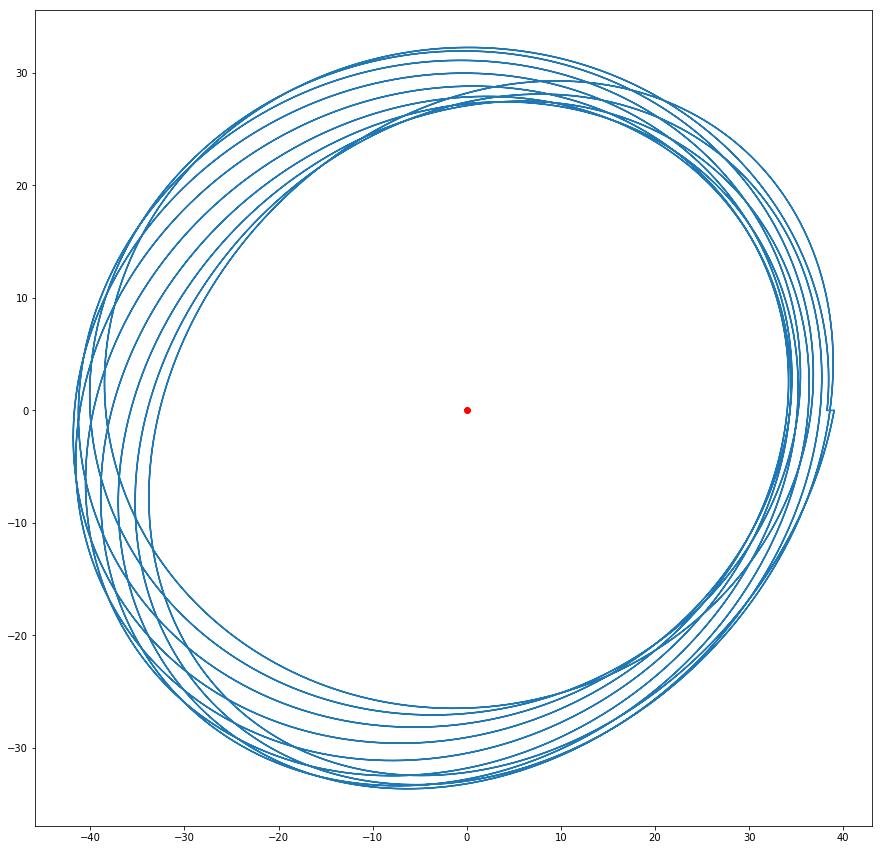

In [86]:
%matplotlib inline

#Load some modules
import sys
sys.path.insert(1, 'tools/')
from PlotModules import *

# Define path to data
directory = 'example_data/'
path_to_data = directory + 'ExampleFormattedData.txt'


#And plot it
dimensions = 2 #Do you want to plot the trajectory in 2 or 3 dimensions?
ax = setup_figure(dimensions)
PlotTheOrbitalDynamics(path_to_data,dimensions,ax)


### Trajectory of light

Now we have the orbital behaviour of the pulsar. The other ingredient for modelling the signal is determining how the light travels beween the pulsar and the BH. Again this involves both mathematical modelling and computational numerical integration. We can integrate either 'forwards' or 'backwards' in time, and either functionality is implemented in Iliad and can be changed in the config file `parameters.f`. For this notebook we will consider the backwards in time case. For this option the ray starts on the observers image plane with some coordinates $(\alpha, \beta)$. By computationally integrating we can 'fire' this ray from the observer's image plane towards the pulsar orbit. The game is then to find the $(\alpha, \beta)$ that cause the ray to 'hit'. To do this we use a non-linear conjugate gradient descent method.


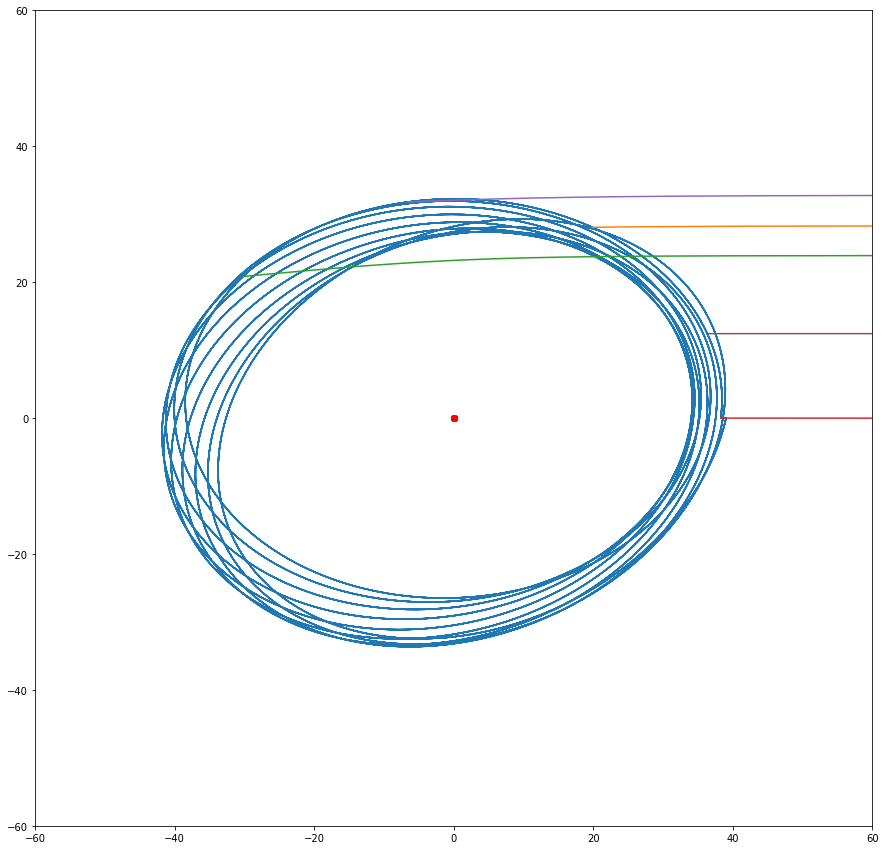

In [91]:
import glob
path_to_ray_data = directory + 'RT/'


#Set up a new figure which has the pulsar orbital dynamics
dimensions = 2 #Do you want to plot the trajectory in 2 or 3 dimensions?
ax = setup_figure(dimensions)
PlotTheOrbitalDynamics(path_to_data,dimensions,ax)

#And now plot the light rays
for f in glob.glob(path_to_ray_data+'*.txt'): #we have a subfolder with multiple files, each of which describes the spatial trajectory of our light ray
    PlotTheRay(f,dimensions, ax) #add the light ray to the previous plot


